In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#Collecting Data
data = pd.read_csv(r'Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.drop(columns=['Id', 'Species'], inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


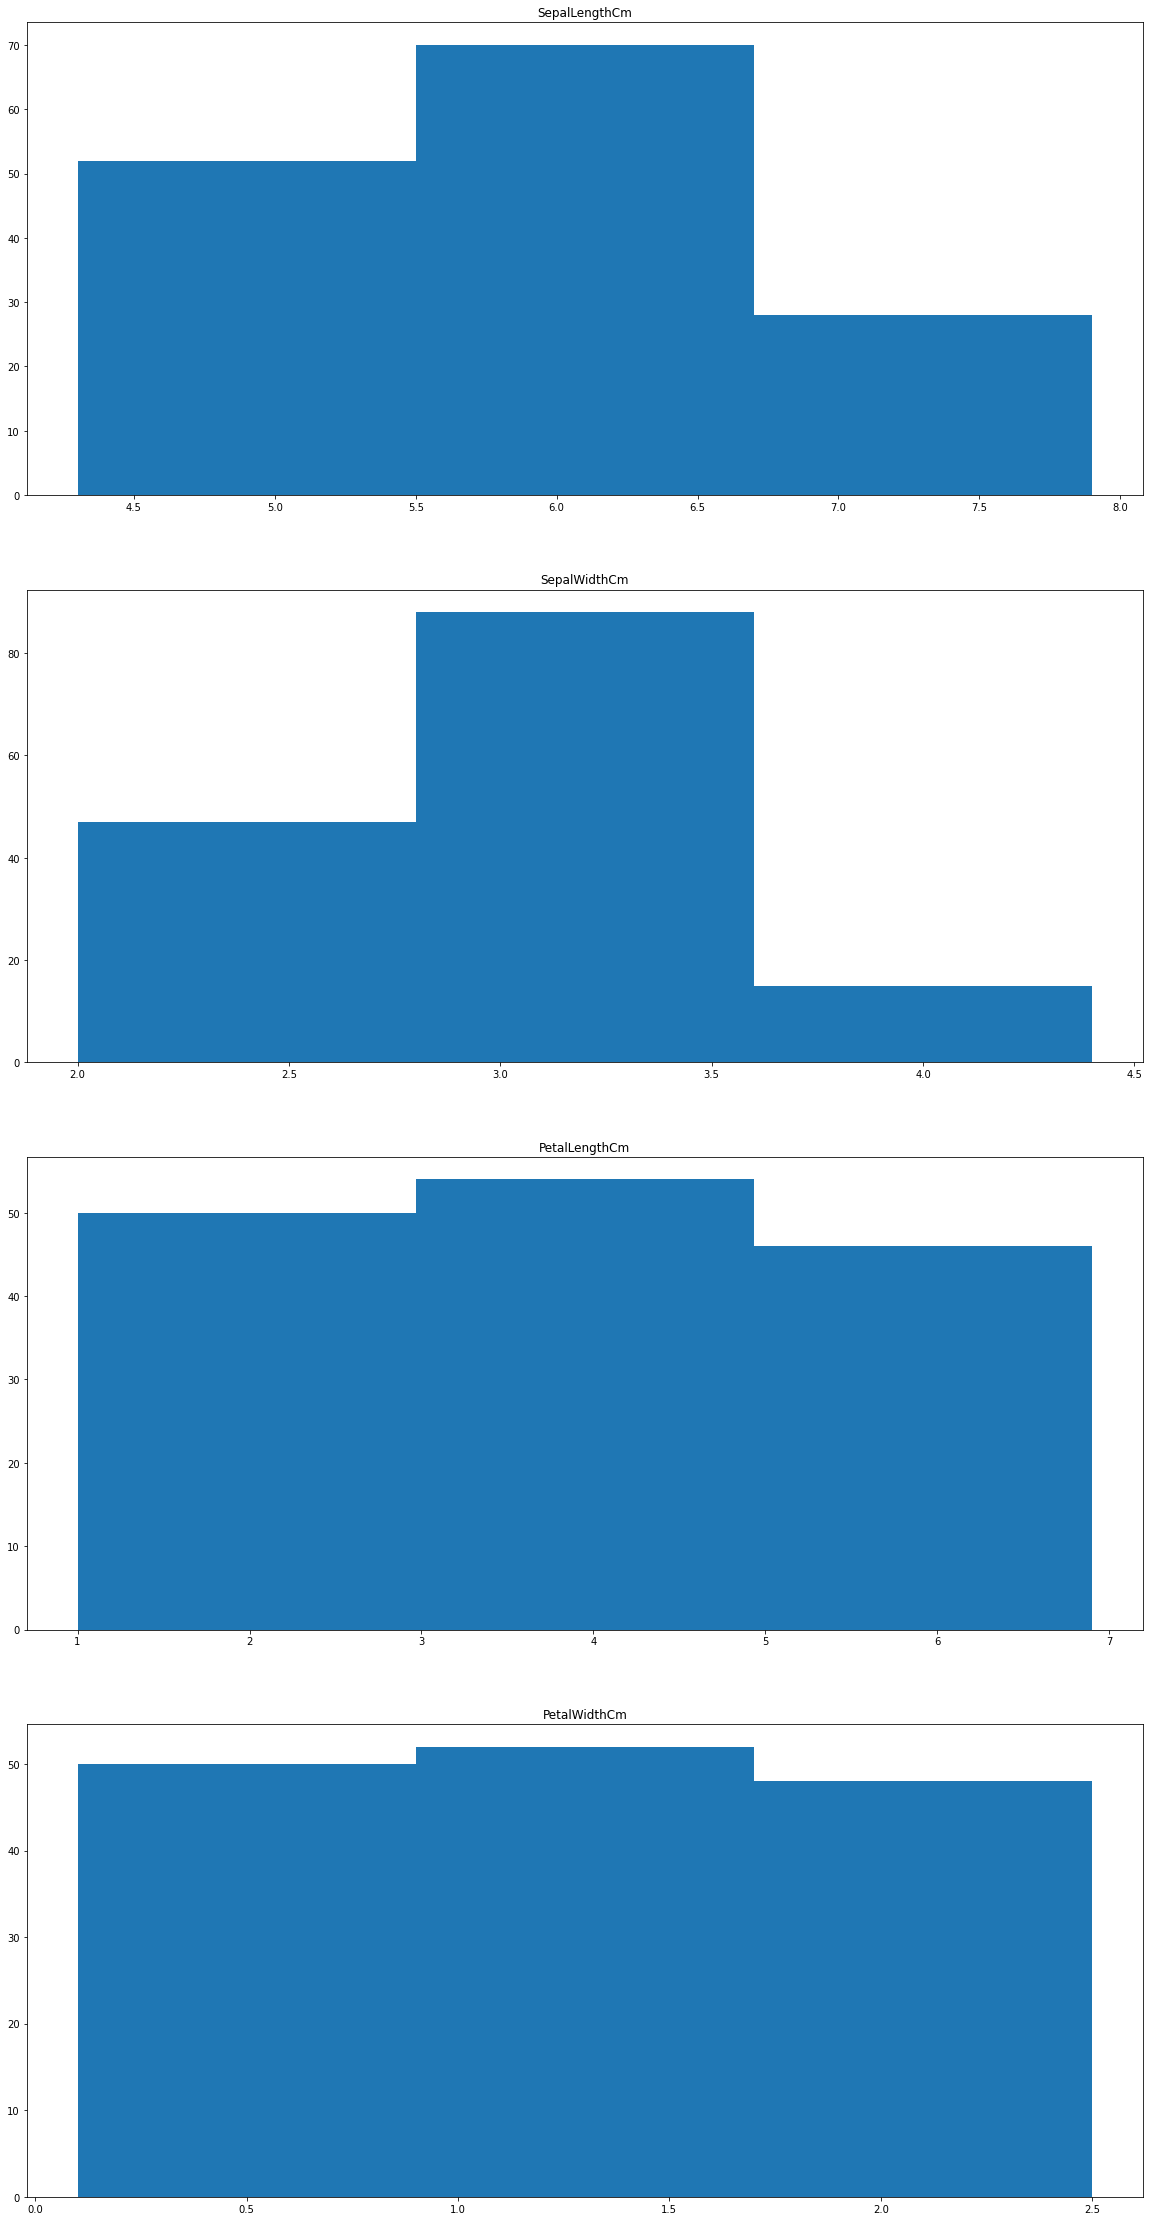

In [6]:
fig, axes = plt.subplots(4,1, figsize=(20,40))
for col, axis in zip(data.columns,axes):
    axis.hist(data[[col]], bins=3)
    axis.set_title(f'{col}')

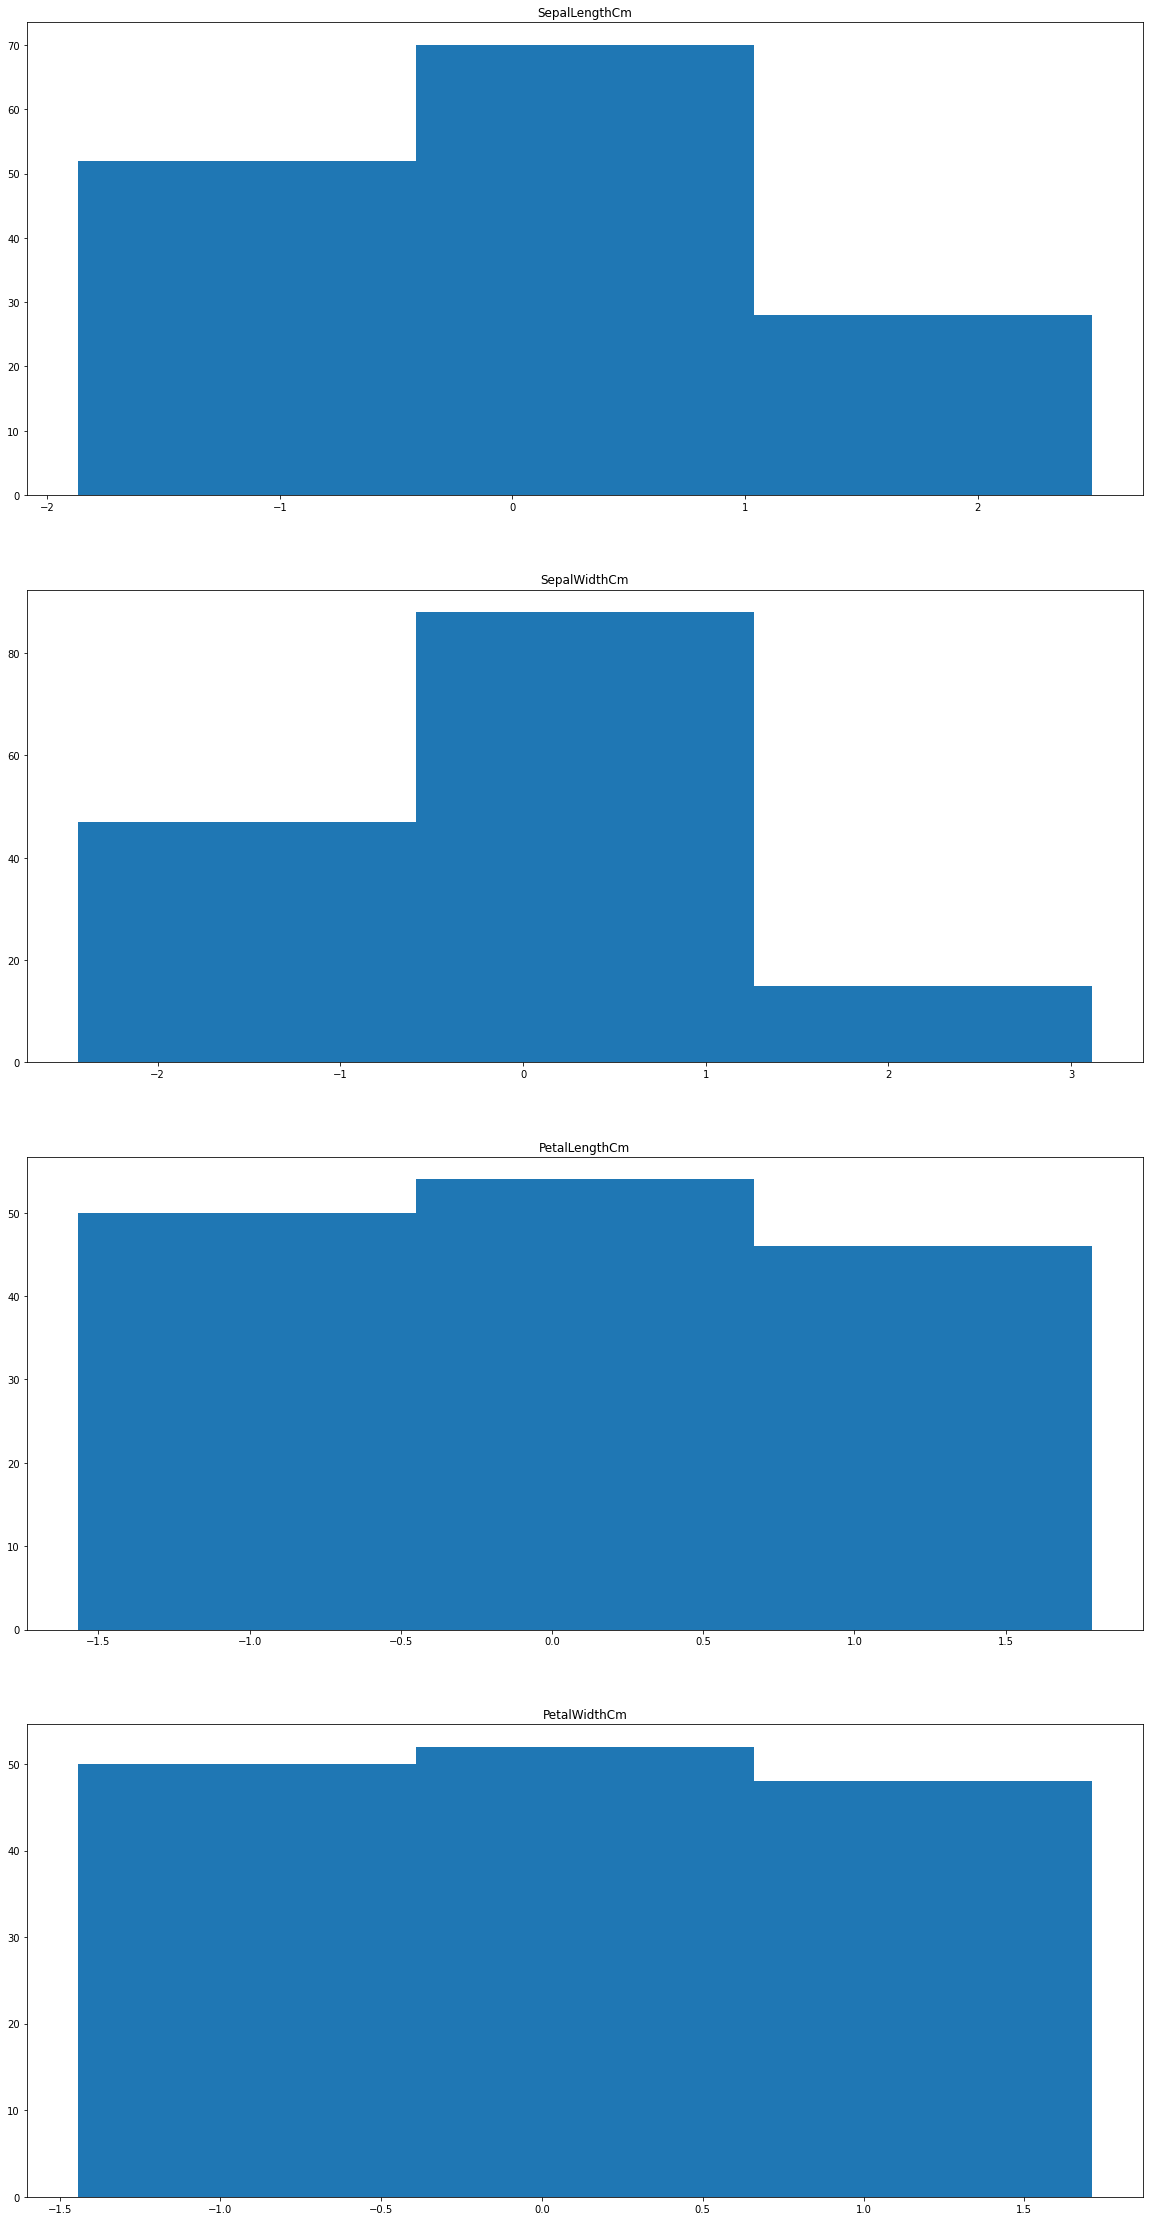

In [7]:
# Data Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(data)
# scaledX[:, 0]

fig1, axes1 = plt.subplots(4,1, figsize=(20,40))
for index, col, axis in zip(range(4), data.columns,axes1):
    axis.hist(scaledX[:, index], bins=3)
    axis.set_title(f'{col}')


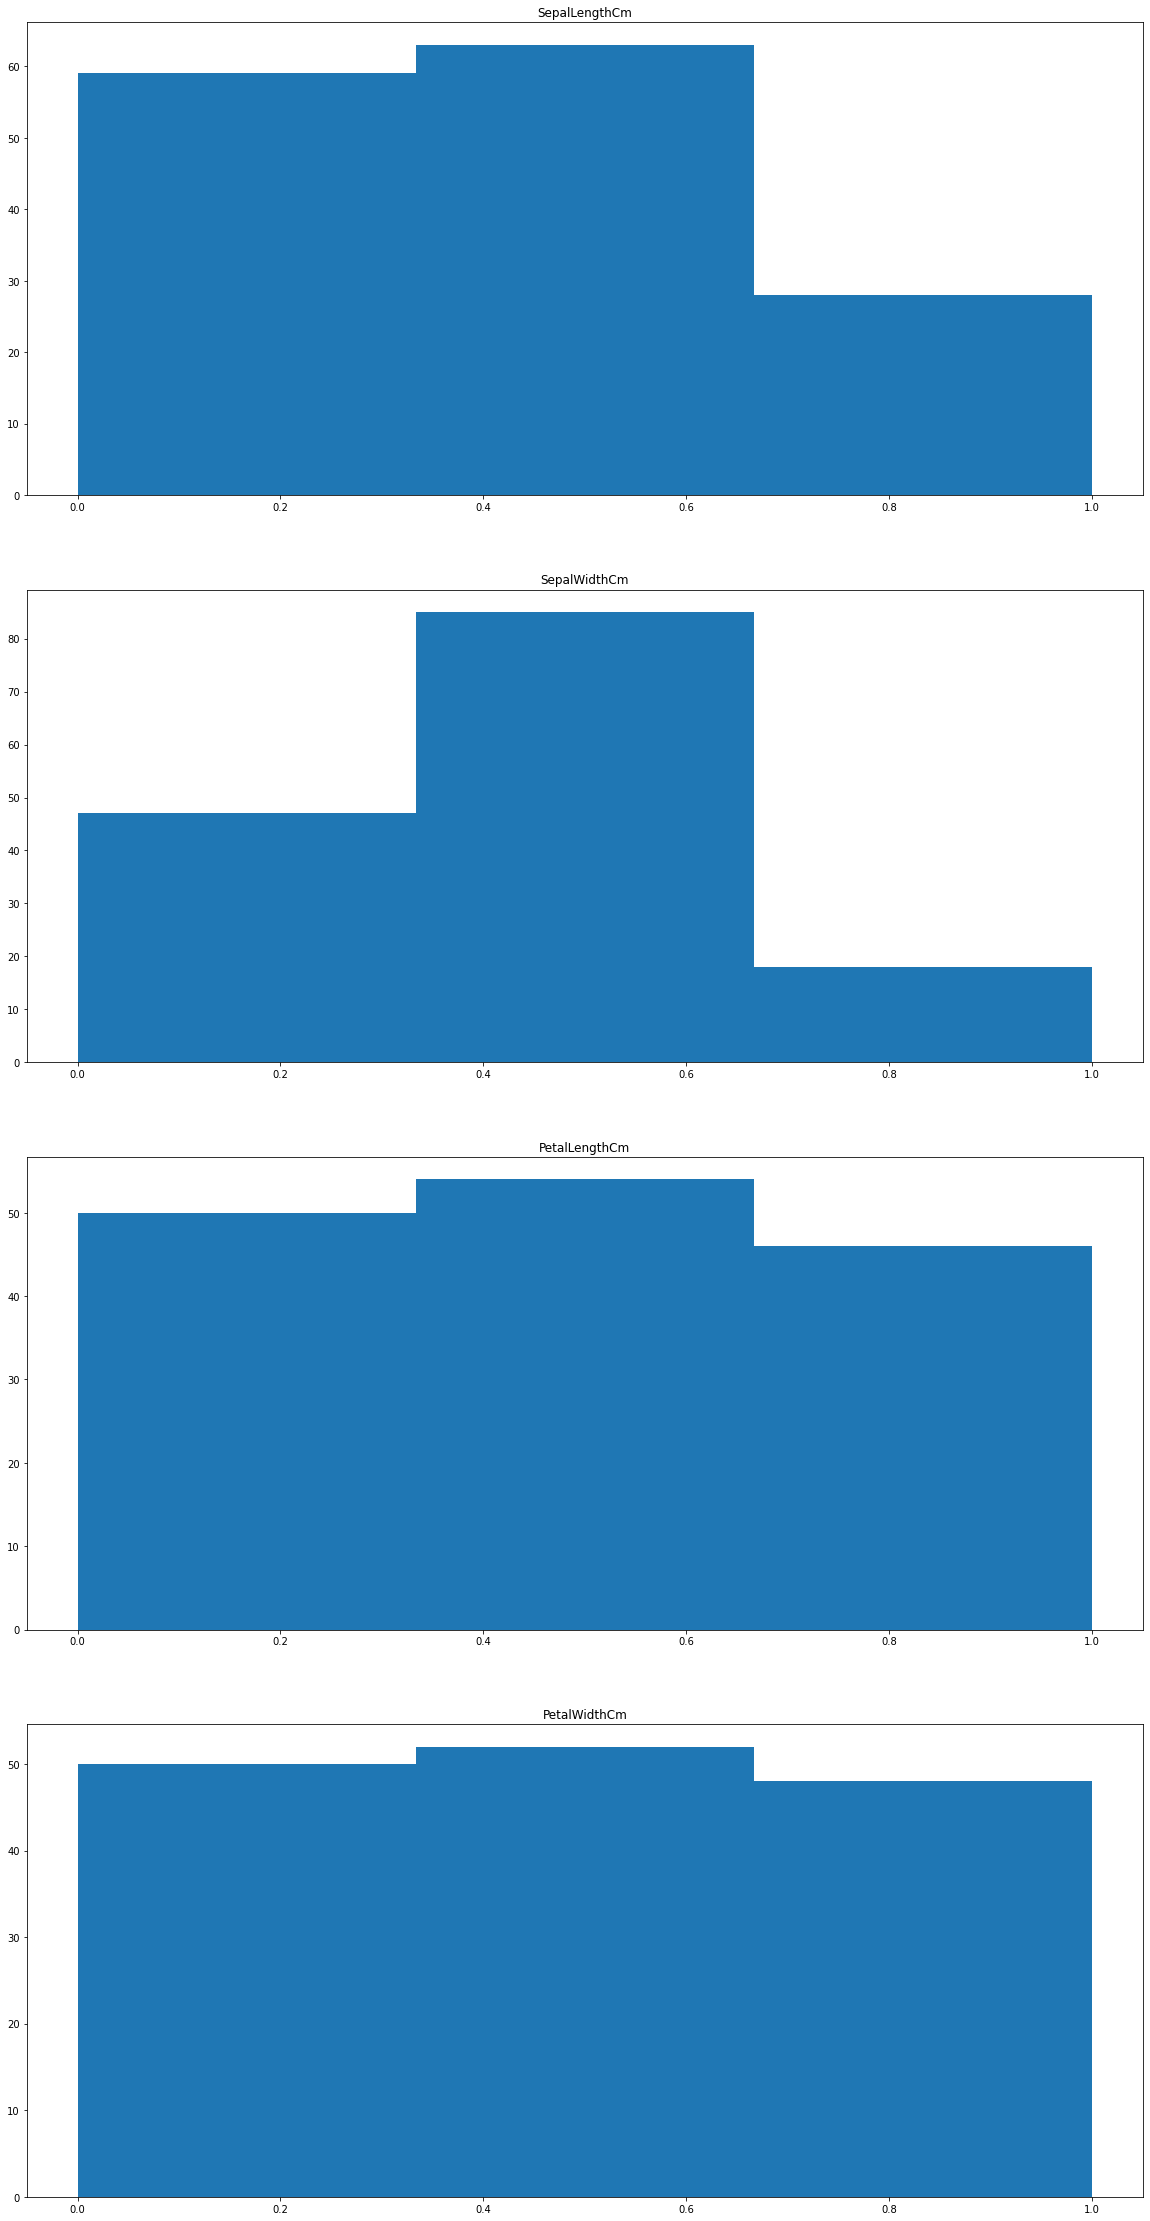

In [8]:
mscaler = MinMaxScaler()
mscaledX = mscaler.fit_transform(data)
# scaledX[:, 0]

fig2, axes2 = plt.subplots(4,1, figsize=(20,40))
for index, col, axis in zip(range(4), data.columns,axes2):
    axis.hist(mscaledX[:, index], bins=3)
    axis.set_title(f'{col}')

In [ ]:
### Split
from sklearn.model_selection import train_test_split

xtrain, xtest = train_test_split(scaledX, test_size=0.2, random_state=1)
xtrain.shape, xtest.shape

In [9]:
## Modeling

from sklearn.cluster import KMeans

model = KMeans()

model.fit(scaledX[:, 2:4])
model.labels_, model.inertia_

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 6, 0, 0, 0, 5, 0, 6, 5, 0, 6, 0, 6, 0,
        0, 6, 0, 6, 7, 6, 0, 0, 6, 0, 0, 7, 0, 5, 6, 5, 6, 0, 0, 0, 0, 6,
        6, 6, 6, 0, 6, 5, 6, 6, 6, 6, 5, 6, 3, 7, 3, 4, 3, 2, 0, 4, 4, 3,
        7, 7, 3, 7, 3, 3, 4, 2, 2, 0, 3, 7, 2, 7, 3, 4, 7, 7, 3, 4, 4, 2,
        3, 0, 4, 3, 3, 4, 7, 3, 3, 3, 7, 3, 3, 3, 7, 7, 3, 7]),
 5.269105150349283)

Text(0, 0.5, 'PetalWidth')

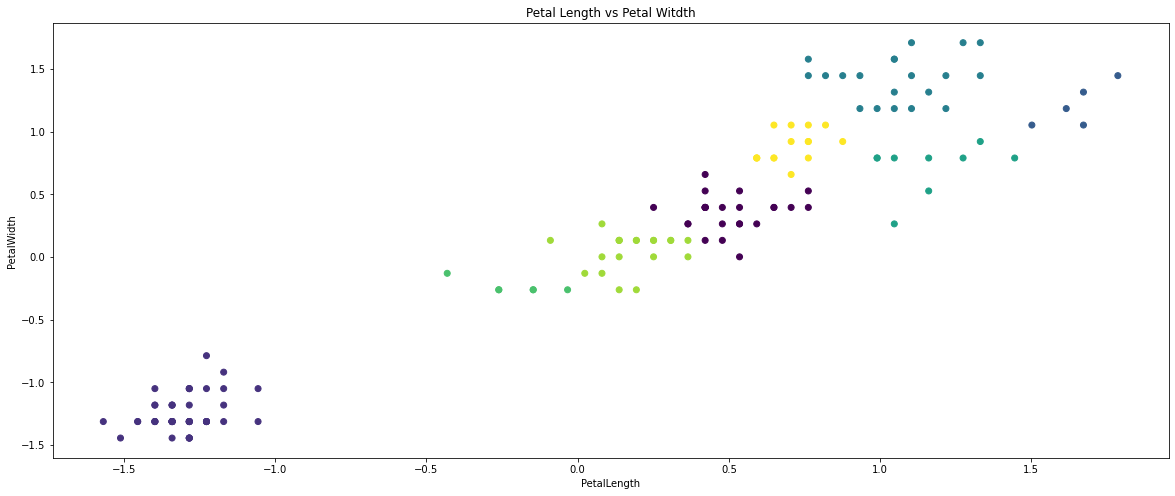

In [12]:
fig3, axes3 = plt.subplots(1,1, figsize=(20,8))
axes3.scatter(scaledX[:, 2], scaledX[:, 3], c=model.labels_)
axes3.set_title('Petal Length vs Petal Witdth')
axes3.set_xlabel('PetalLength')
axes3.set_ylabel('PetalWidth')


Inertia For 2 => 54.14584701344988
Inertia For 3 => 18.046983891906265
Inertia For 4 => 12.307440251261838
Inertia For 5 => 9.175315740007756
Inertia For 6 => 7.215096212730805
Inertia For 7 => 6.04295610489021
Inertia For 8 => 5.1771178630926205
Inertia For 9 => 4.426589153575171
Inertia For 10 => 3.991826144214786
Inertia For 11 => 3.5358655770682232
Inertia For 12 => 3.2685003335526828
Inertia For 13 => 2.9102985529210095
Inertia For 14 => 2.637937749392287


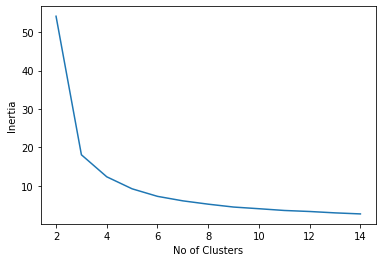

In [14]:
## Choosing K Value
inertia = []
for k in range(2,15):
    Model = KMeans(n_clusters=k)
    Model.fit(scaledX[:, 2:4])
    print(f'Inertia For {k} => {Model.inertia_}')
    inertia.append(Model.inertia_)

plt.plot(list(range(2,15)), inertia)
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Text(0, 0.5, 'PetalWidth')

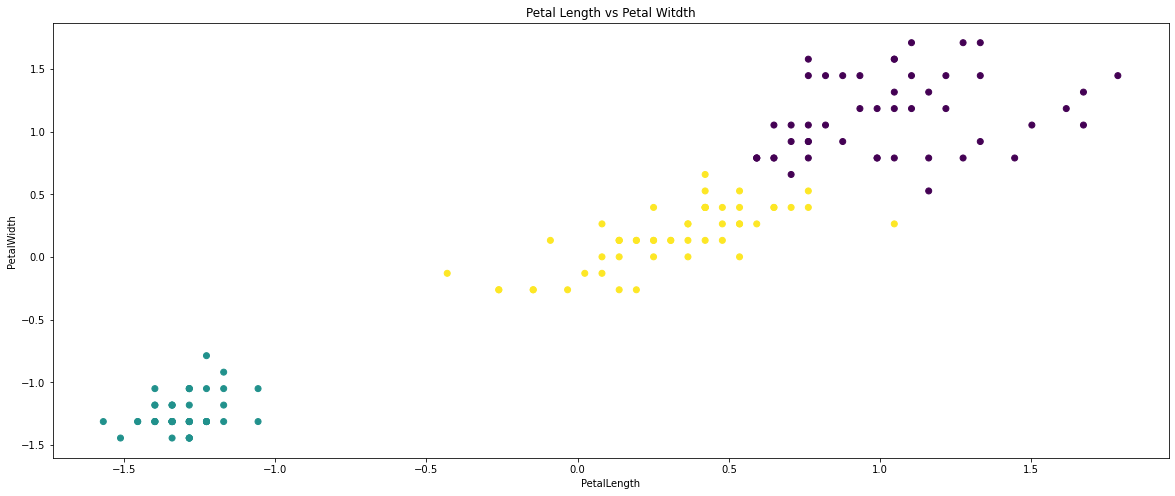

In [16]:
## Final Model
fmodel = KMeans(n_clusters=3)
fmodel.fit(scaledX[:, 2:4])
ypred = fmodel.predict(scaledX[:, 2:4])
print(ypred)
fig4, axes4 = plt.subplots(1,1, figsize=(20,8))
axes4.scatter(scaledX[:, 2], scaledX[:, 3], c=ypred)
axes4.set_title('Petal Length vs Petal Witdth')
axes4.set_xlabel('PetalLength')
axes4.set_ylabel('PetalWidth')

In [22]:
set(fmodel.labels_)


{0, 1, 2}

In [21]:
## Validation
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_score(scaledX, ypred), silhouette_samples(scaledX, ypred)

(0.4058423080989275,
 array([ 0.722247  ,  0.56987923,  0.67629085,  0.62186704,  0.71445017,
         0.58941292,  0.69200714,  0.72212028,  0.49340521,  0.63388098,
         0.65669463,  0.71418823,  0.5808287 ,  0.55219397,  0.52991719,
         0.43362475,  0.60168032,  0.71681973,  0.56313191,  0.66076007,
         0.64709256,  0.67452273,  0.68589786,  0.62911683,  0.69340125,
         0.54546127,  0.69561537,  0.70883433,  0.70438264,  0.66657539,
         0.62659719,  0.63429408,  0.57034977,  0.5189986 ,  0.63388098,
         0.67306767,  0.65018104,  0.63388098,  0.55588857,  0.71530033,
         0.72206117,  0.09810196,  0.63655292,  0.65199361,  0.63106498,
         0.56149595,  0.66199351,  0.66506874,  0.67237576,  0.70502966,
        -0.17083695, -0.01156106, -0.20168651,  0.45958138,  0.15589313,
         0.47866349, -0.11144993,  0.36939041,  0.17047162,  0.46550045,
         0.38017128,  0.32640121,  0.41554323,  0.31852207,  0.46733716,
         0.00339362,  0.335686

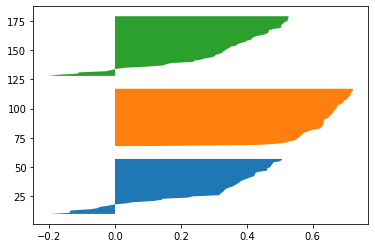

In [35]:
sscore, sSample = silhouette_score(scaledX, ypred), silhouette_samples(scaledX, ypred)
ylow = 10
for i in set(fmodel.labels_):
    isample = sSample[ypred == i]
    isample.sort()
    yup = ylow + isample.shape[0]
    plt.fill_betweenx(np.arange(ylow, yup), 0, isample)
    ylow = yup+10
plt.show()

In [30]:
sSample[ypred == 2]

array([-0.17083695, -0.01156106, -0.20168651,  0.45958138,  0.15589313,
        0.47866349, -0.11144993,  0.36939041,  0.17047162,  0.46550045,
        0.38017128,  0.32640121,  0.41554323,  0.31852207,  0.46733716,
        0.00339362,  0.3356862 ,  0.52402669,  0.30621515,  0.52578442,
        0.44815492,  0.26279487,  0.41368687,  0.29678392,  0.10229684,
        0.03321183,  0.32910331,  0.52393459,  0.50440719,  0.50313168,
        0.52809209,  0.24054682,  0.33886743, -0.02784039, -0.11073412,
        0.34866192,  0.42057893,  0.50708247,  0.51165041,  0.27330048,
        0.5260976 ,  0.39923578,  0.51532702,  0.42824728,  0.46634687,
        0.37125899,  0.39563229,  0.50409033,  0.35134488,  0.30272677,
        0.14678348,  0.23699581])

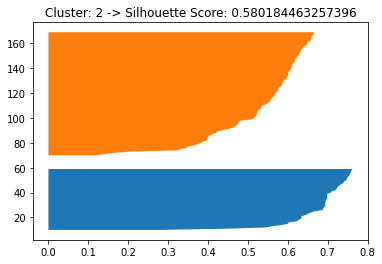

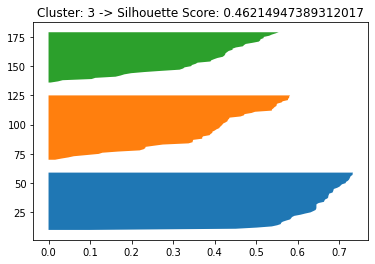

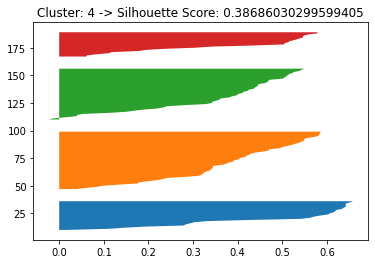

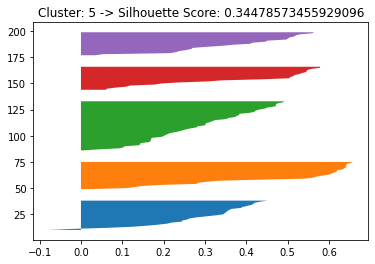

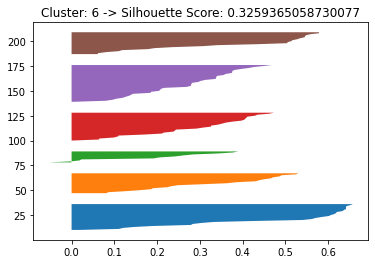

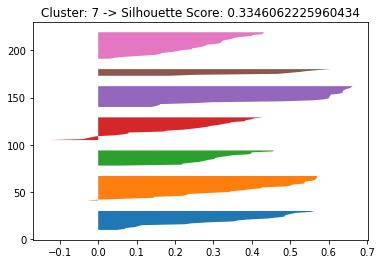

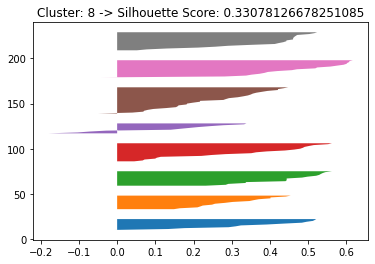

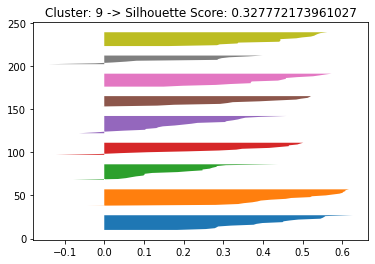

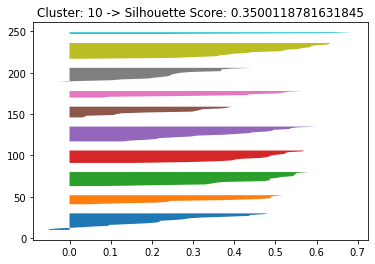

In [41]:
## For all K
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=10)
    ypred = km.fit_predict(scaledX)
    sscore, sSample = silhouette_score(scaledX, ypred), silhouette_samples(scaledX, ypred)
    ylow = 10
    for i in set(km.labels_):
        isample = sSample[ypred == i]
        isample.sort()
        yup = ylow + isample.shape[0]
        plt.fill_betweenx(np.arange(ylow, yup), 0, isample)
        plt.title(f'Cluster: {k} -> Silhouette Score: {sscore}')
        ylow = yup+10
    plt.show()